Exercise 1


In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding


In [2]:
corpus = [
    "This is good pizza",
    "I love Italian pizza",
    "The best pizza",
    "nice pizza",
    "Excellent pizza",
    "I love pizza",
    "The pizza was alright",
    "disgusting pineapple pizza",
    "not good pizza",
    "bad pizza",
    "very bad pizza",
    "I had better pizza"
]


In [3]:
labels = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [4]:
df = pd.DataFrame({'text': corpus, 'sentiment': labels})


In [5]:
vocab_size = 50
encoded_docs = [one_hot(sentence, vocab_size) for sentence in df['text']]


In [6]:
max_length = max(len(doc) for doc in encoded_docs)
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')


In [7]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=max_length))  # roughly 5.8 -> 8
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
model.fit(padded_docs, df['sentiment'], epochs=50, verbose=0)


In [9]:
loss, accuracy = model.evaluate(padded_docs, df['sentiment'], verbose=0)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Exercise 2

In [10]:
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
# Loading the CSV
df = pd.read_csv('Tweets.csv')


In [13]:
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


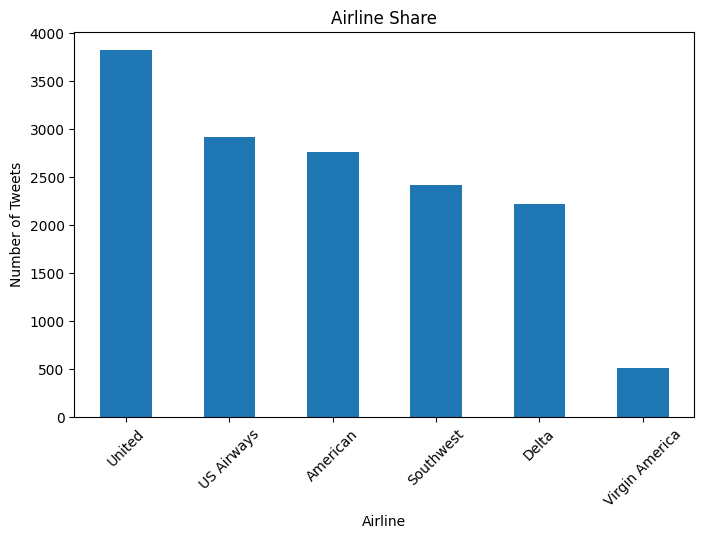

In [14]:
df['airline'].value_counts().plot(kind='bar', figsize=(8, 5), title='Airline Share')
plt.xlabel("Airline")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()


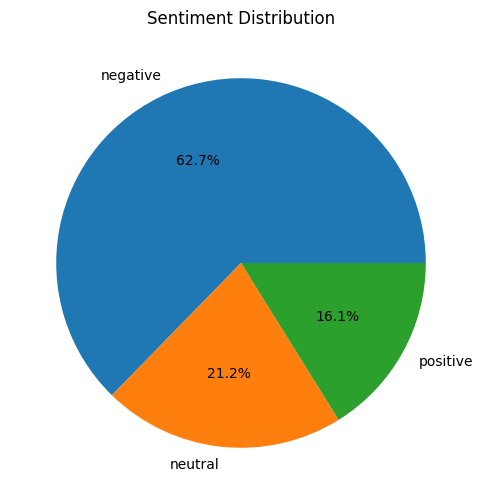

In [15]:
df['airline_sentiment'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', title='Sentiment Distribution', figsize=(6, 6))
plt.ylabel('')
plt.show()


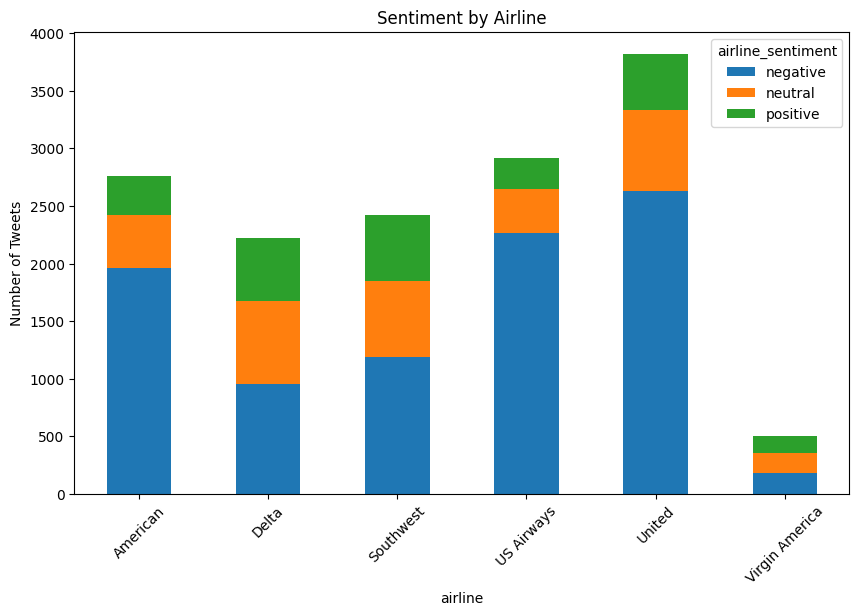

In [16]:
sentiment_airline = pd.crosstab(df['airline'], df['airline_sentiment'])

sentiment_airline.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Airline')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()


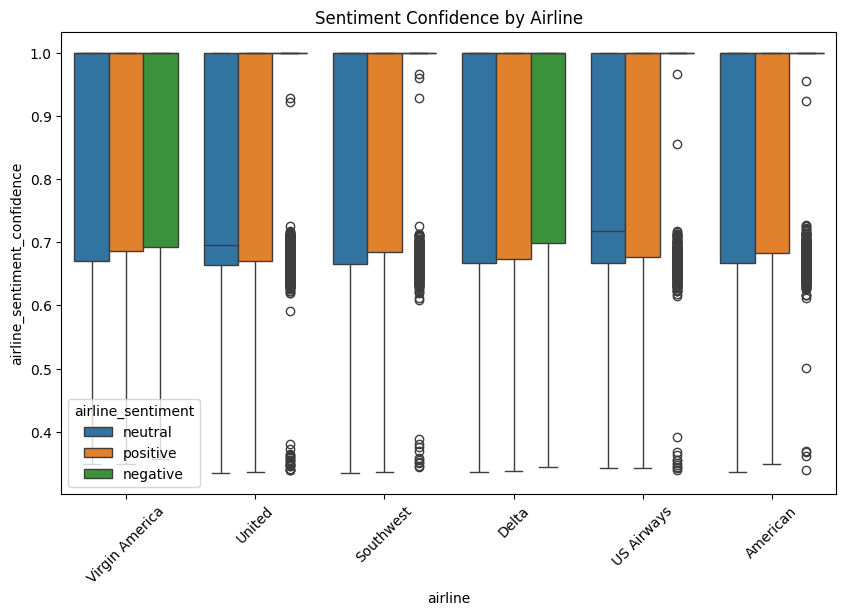

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='airline', y='airline_sentiment_confidence', hue='airline_sentiment')
plt.title('Sentiment Confidence by Airline')
plt.xticks(rotation=45)
plt.show()


In [18]:
X = df['text']
y = df['airline_sentiment']


In [19]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove punctuation
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

X_cleaned = X.apply(clean_text)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X_cleaned)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
predictions = model.predict(X_test)


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))


Confusion Matrix:
 [[1694  149   46]
 [ 236  288   56]
 [ 126   47  286]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1889
     neutral       0.60      0.50      0.54       580
    positive       0.74      0.62      0.68       459

    accuracy                           0.77      2928
   macro avg       0.72      0.67      0.69      2928
weighted avg       0.76      0.77      0.77      2928


Accuracy Score: 0.7745901639344263


#Conclusion:
The accuracy is 77% and the Negative tweets dominate and the precision and recall for neutral data is lower because of less data.
